<a href="https://colab.research.google.com/github/hmulli2/Anomaly-Detection-IP-Address/blob/main/IP_Address_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import datetime
import pandas as pd
import numpy as np

In [268]:
import matplotlib as plt
import matplotlib.pyplot as pyplot

In [269]:
df = pd.read_csv('/content/drive/MyDrive/henry.csv')
df.head(10)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.5.143,52.85.151.42,TLSv1.2,100,Application Data
1,2,0.000030,192.168.5.143,35.244.181.201,TLSv1.2,100,Application Data
2,3,0.000060,52.85.151.42,192.168.5.143,TCP,60,443 > 59404 [ACK] Seq=1 Ack=47 Win=64240 Len=0
3,4,0.000091,35.244.181.201,192.168.5.143,TCP,60,443 > 42464 [ACK] Seq=1 Ack=47 Win=64240 Len=0
4,5,0.000236,192.168.5.143,52.85.151.42,TLSv1.2,85,Encrypted Alert
5,6,0.000236,192.168.5.143,52.85.151.42,TCP,60,"59404 > 443 [FIN, ACK] Seq=78 Ack=1 Win=6336..."
6,7,0.000264,52.85.151.42,192.168.5.143,TCP,60,443 > 59404 [ACK] Seq=1 Ack=78 Win=64240 Len=0
7,8,0.000308,52.85.151.42,192.168.5.143,TCP,60,443 > 59404 [ACK] Seq=1 Ack=79 Win=64239 Len=0
8,9,0.000459,192.168.5.143,35.244.181.201,TLSv1.2,85,Encrypted Alert
9,10,0.000459,35.244.181.201,192.168.5.143,TCP,60,443 > 42464 [ACK] Seq=1 Ack=78 Win=64240 Len=0


In [270]:
print(len(df['Source'].unique()))
print(len(df['Destination'].unique()))

29
28


In [271]:
df.Protocol.value_counts()

TCP        391
TLSv1.3    113
DNS         52
HTTP        45
ARP         20
QUIC        18
NTP          8
DHCPv6       7
TLSv1.2      6
OCSP         2
Name: Protocol, dtype: int64

In [272]:
# Drop rows for Protocal countries:
df = df[df.Protocol != 'ARP']


In [273]:
df = df[df.Protocol != 'DHCPv6']

In [274]:
df.Protocol.value_counts()

TCP        391
TLSv1.3    113
DNS         52
HTTP        45
QUIC        18
NTP          8
TLSv1.2      6
OCSP         2
Name: Protocol, dtype: int64

In [275]:
src_ip_df = df['Source'].copy()
dst_ip_df = df['Destination'].copy()
src_ip_df = src_ip_df.reset_index()


dst_ip_df = dst_ip_df.reset_index()


In [276]:
print(src_ip_df.shape)
src_ip_df.head(5)


(635, 2)


,index,Source
0,0,192.168.5.143
1,1,192.168.5.143
2,2,52.85.151.42
3,3,35.244.181.201
4,4,192.168.5.143


In [277]:
print(dst_ip_df.shape)
dst_ip_df.head(5)

(635, 2)


,index,Destination
0,0,52.85.151.42
1,1,35.244.181.201
2,2,192.168.5.143
3,3,192.168.5.143
4,4,52.85.151.42


In [278]:
src_ip_df['Source'].isnull().sum()

0

In [279]:
dst_ip_df['Destination'].isnull().sum()

0

In [280]:
display(src_ip_df)

,index,Source
0,0,192.168.5.143
1,1,192.168.5.143
2,2,52.85.151.42
3,3,35.244.181.201
4,4,192.168.5.143
...,...,...
630,657,151.205.4.167
631,658,192.168.5.143
632,659,18.67.76.44
633,660,192.168.5.143


In [281]:
#Skipped dropping duplicates
#src_ip_df=src_ip_df.drop_duplicates(['Source'])
#dst_ip_df=dst_ip_df.drop_duplicates(['Destination'])
#print(src_ip_df.shape)
#print(dst_ip_df.shape)

In [282]:
src_ip_df.loc[:, 'oct1'] = src_ip_df['Source'].apply(lambda x: x.split(".")[0])
src_ip_df.loc[:, 'oct2'] = src_ip_df['Source'].apply(lambda x: x.split(".")[1])
src_ip_df.loc[:, 'oct3'] = src_ip_df['Source'].apply(lambda x: x.split(".")[2])
src_ip_df.loc[:, 'oct4'] = src_ip_df['Source'].apply(lambda x: x.split(".")[3])

dst_ip_df.loc[:, 'oct1'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[0])
dst_ip_df.loc[:, 'oct2'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[1])
dst_ip_df.loc[:, 'oct3'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[2])
dst_ip_df.loc[:, 'oct4'] = dst_ip_df['Destination'].apply(lambda x: x.split(".")[3])

In [283]:
src_ip_df = src_ip_df.reset_index()
dst_ip_df = dst_ip_df.reset_index()

In [284]:
print(src_ip_df.head(5))
print()
print(dst_ip_df.head(5))

   level_0  index          Source oct1 oct2 oct3 oct4
0        0      0   192.168.5.143  192  168    5  143
1        1      1   192.168.5.143  192  168    5  143
2        2      2    52.85.151.42   52   85  151   42
3        3      3  35.244.181.201   35  244  181  201
4        4      4   192.168.5.143  192  168    5  143

   level_0  index     Destination oct1 oct2 oct3 oct4
0        0      0    52.85.151.42   52   85  151   42
1        1      1  35.244.181.201   35  244  181  201
2        2      2   192.168.5.143  192  168    5  143
3        3      3   192.168.5.143  192  168    5  143
4        4      4    52.85.151.42   52   85  151   42


In [285]:
src_ip_df=src_ip_df.drop(['level_0'], axis = 1)
dst_ip_df=dst_ip_df.drop(['level_0'], axis = 1)
dst_ip_df

,index,Destination,oct1,oct2,oct3,oct4
0,0,52.85.151.42,52,85,151,42
1,1,35.244.181.201,35,244,181,201
2,2,192.168.5.143,192,168,5,143
3,3,192.168.5.143,192,168,5,143
4,4,52.85.151.42,52,85,151,42
...,...,...,...,...,...,...
630,657,192.168.5.140,192,168,5,140
631,658,18.67.76.44,18,67,76,44
632,659,192.168.5.143,192,168,5,143
633,660,23.207.202.52,23,207,202,52


In [286]:
src_ip_df

,index,Source,oct1,oct2,oct3,oct4
0,0,192.168.5.143,192,168,5,143
1,1,192.168.5.143,192,168,5,143
2,2,52.85.151.42,52,85,151,42
3,3,35.244.181.201,35,244,181,201
4,4,192.168.5.143,192,168,5,143
...,...,...,...,...,...,...
630,657,151.205.4.167,151,205,4,167
631,658,192.168.5.143,192,168,5,143
632,659,18.67.76.44,18,67,76,44
633,660,192.168.5.143,192,168,5,143


In [287]:
X_matrix_src = np.array(src_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(X_matrix_src.shape)
print(X_matrix_src[0:5])
print()

X_matrix_dst = np.array(dst_ip_df[['oct1', 'oct2', 'oct3', 'oct4']])
print(X_matrix_dst.shape)
print(X_matrix_dst[0:5])

(635, 4)
[['192' '168' '5' '143']
 ['192' '168' '5' '143']
 ['52' '85' '151' '42']
 ['35' '244' '181' '201']
 ['192' '168' '5' '143']]

(635, 4)
[['52' '85' '151' '42']
 ['35' '244' '181' '201']
 ['192' '168' '5' '143']
 ['192' '168' '5' '143']
 ['52' '85' '151' '42']]


In [288]:
#Applying PCA to reduce dimensions
from sklearn.decomposition import PCA

# source
pcas = PCA(n_components=4)
pcas.fit(X_matrix_src)
print(pcas.explained_variance_ratio_)

#destination
pcad = PCA(n_components=4)
pcad.fit(X_matrix_dst)
print(pcad.explained_variance_ratio_)

[0.71267233 0.13545224 0.10367445 0.04820098]
[0.67989772 0.1597727  0.11273813 0.04759146]


In [289]:
pca_src = PCA(n_components=2)
pcas = pca_src.fit_transform(X_matrix_src)

pca_dest = PCA(n_components=2)
pcad = pca_dest.fit_transform(X_matrix_dst)

pcas1=[]
pcas2=[]

pcad1=[]
pcad2=[]


#source
for i in pcas:
    pcas1.append(i[0])
    pcas2.append(i[1])
    
#destination
for i in pcad:
    pcad1.append(i[0])
    pcad2.append(i[1])
    
print(len(pcas1))
print(len(pcas2))

print(len(pcad1))
print(len(pcad2))

635
635
635
635


In [290]:
print(pcas.shape)
print(pcad.shape)

(635, 2)
(635, 2)


In [291]:
src_ip_df['pca1'] = pcas1
src_ip_df['pca2'] = pcas2
print(src_ip_df[:2])
print()
#dst_ip_df['pca1'] = pcad1
#dst_ip_df['pca2'] = pcad2

#print(dst_ip_df[:2])

   index         Source oct1 oct2 oct3 oct4       pca1      pca2
0      0  192.168.5.143  192  168    5  143 -67.555033 -7.549024
1      1  192.168.5.143  192  168    5  143 -67.555033 -7.549024



In [292]:
# Maintain a copy for using for K-Means later.
dst_ip_df_copy = dst_ip_df.copy()
src_ip_df_copy = src_ip_df.copy()

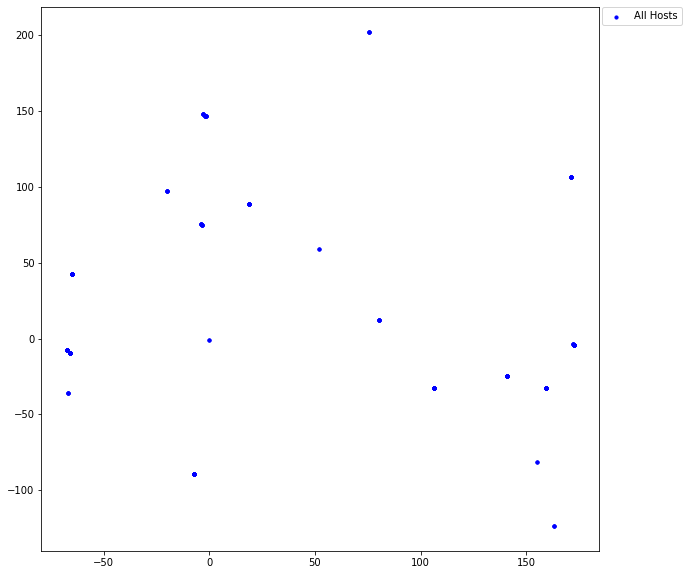

In [293]:
#scatter plot source Ip address
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(src_ip_df['pca1'], src_ip_df['pca2'], s=10, color='blue',label="All Hosts")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

In [294]:
from sklearn.mixture import BayesianGaussianMixture

# Check clusters
bgms = BayesianGaussianMixture(n_components= 3, n_init=10, random_state= 100)
bgms.fit(X_matrix_src)
np.round(bgms.weights_,2)

array([0.66, 0.26, 0.08])

In [295]:
print(bgms.means_)
pca_means = pca_src.transform(bgms.means_)
print()
print(pca_means)

[[188.56173654 170.96812308   5.00588701 135.72301604]
 [ 42.03035702  91.28770885 118.87866275  44.94027808]
 [111.71726135 230.08980396  86.1236433  150.10094155]]

[[-63.27824477  -8.77933078]
 [157.98475766  -8.10559584]
 [  2.49950569  96.66243374]]


In [296]:
means_df_s = pd.DataFrame(pca_means, columns = ['pca1','pca2'])
means_df_s

,pca1,pca2
0,-63.278245,-8.779331
1,157.984758,-8.105596
2,2.499506,96.662434


In [297]:
#predict cluster for source IP
bgms.predict(X_matrix_src)

array([0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [298]:
src_ip_df['kcluster']=bgms.predict(X_matrix_src).tolist()
src_ip_df.tail(10)

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
625,652,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
626,653,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
627,654,151.205.4.167,151,205,4,167,-65.091781,42.746060,0
628,655,192.168.5.140,192,168,5,140,-66.271310,-9.294815,0
629,656,192.168.5.140,192,168,5,140,-66.271310,-9.294815,0
630,657,151.205.4.167,151,205,4,167,-65.091781,42.746060,0
631,658,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
632,659,18.67.76.44,18,67,76,44,159.214668,-32.553107,1
633,660,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
634,661,23.207.202.52,23,207,202,52,171.308977,106.745780,1


In [299]:
#clusters identified by GMM
dfs0 = src_ip_df[src_ip_df.kcluster==0]
dfs1 = src_ip_df[src_ip_df.kcluster==1]
dfs2 = src_ip_df[src_ip_df.kcluster==2]

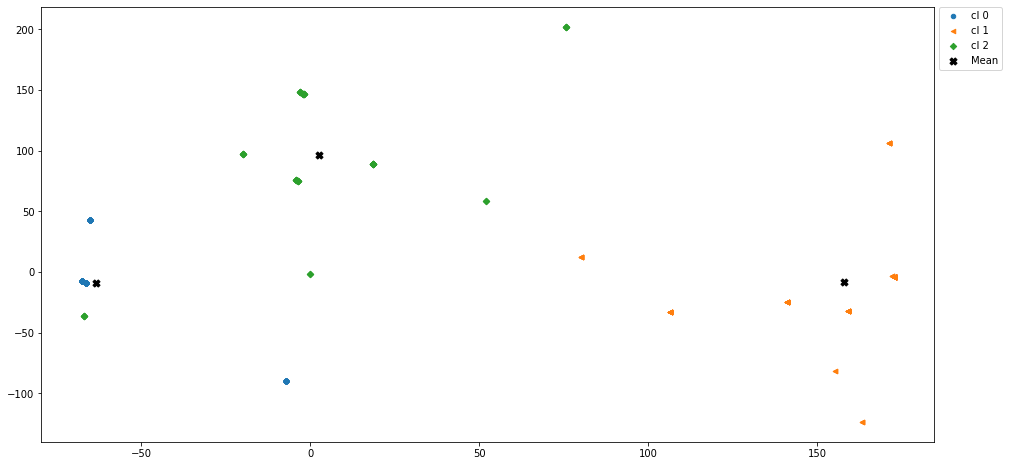

In [300]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfs0['pca1'],dfs0['pca2'],s=20,label="cl 0")
pyplot.scatter(dfs1['pca1'],dfs1['pca2'],s=20,marker="<",label="cl 1")
pyplot.scatter(dfs2['pca1'],dfs2['pca2'],s=20,marker="D",label="cl 2")
pyplot.scatter(means_df_s['pca1'],means_df_s['pca2'],s=50,marker="X",label="Mean", color='black')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()

In [301]:
dfs0

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
0,0,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
1,1,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
4,4,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
5,5,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
8,8,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0
...,...,...,...,...,...,...,...,...,...
628,655,192.168.5.140,192,168,5,140,-66.271310,-9.294815,0
629,656,192.168.5.140,192,168,5,140,-66.271310,-9.294815,0
630,657,151.205.4.167,151,205,4,167,-65.091781,42.746060,0
631,658,192.168.5.143,192,168,5,143,-67.555033,-7.549024,0


In [302]:
dfs1

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
2,2,52.85.151.42,52,85,151,42,172.293404,-3.571956,1
6,6,52.85.151.42,52,85,151,42,172.293404,-3.571956,1
7,7,52.85.151.42,52,85,151,42,172.293404,-3.571956,1
12,12,52.85.151.42,52,85,151,42,172.293404,-3.571956,1
55,55,13.107.4.52,13,107,4,52,106.423880,-32.742597,1
...,...,...,...,...,...,...,...,...,...
617,644,10.0.0.6,10,0,0,6,163.211298,-123.717453,1
619,646,18.67.76.44,18,67,76,44,159.214668,-32.553107,1
621,648,23.207.202.52,23,207,202,52,171.308977,106.745780,1
632,659,18.67.76.44,18,67,76,44,159.214668,-32.553107,1


In [303]:
dfs2

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
3,3,35.244.181.201,35,244,181,201,75.719728,202.252276,2
9,9,35.244.181.201,35,244,181,201,75.719728,202.252276,2
11,11,35.244.181.201,35,244,181,201,75.719728,202.252276,2
14,14,35.244.181.201,35,244,181,201,75.719728,202.252276,2
17,17,216.229.0.50,216,229,0,50,-67.047723,-36.165284,2
25,25,17.253.21.201,17,253,21,201,-1.713689,146.483314,2
28,28,17.253.21.201,17,253,21,201,-1.713689,146.483314,2
29,29,17.253.21.201,17,253,21,201,-1.713689,146.483314,2
32,32,17.253.21.201,17,253,21,201,-1.713689,146.483314,2
38,38,17.253.21.201,17,253,21,201,-1.713689,146.483314,2


In [304]:
#Find anomalies/outliers
densities_s = bgms.score_samples(X_matrix_src)
dens_threshold_s = np.percentile(densities_s,4)

print("Maximum density: " + str(max(densities_s)))
print("Minimum density: " + str(min(densities_s)))
print("Threshold density: " + str(dens_threshold_s))

anomalies_s = X_matrix_src[densities_s < dens_threshold_s]

Maximum density: -12.660382838878357
Minimum density: -33.13322428370207
Threshold density: -24.45163909633474


In [305]:
print(anomalies_s)
print(len(anomalies_s))

[['216' '229' '0' '50']
 ['35' '163' '37' '142']
 ['35' '163' '37' '142']
 ['10' '0' '0' '6']
 ['216' '229' '0' '50']
 ['34' '104' '35' '123']
 ['34' '104' '35' '123']
 ['34' '104' '35' '123']
 ['34' '104' '35' '123']
 ['34' '104' '35' '123']
 ['34' '104' '35' '123']
 ['23' '207' '202' '52']
 ['23' '207' '202' '52']
 ['23' '207' '202' '52']
 ['10' '0' '0' '6']
 ['23' '207' '202' '52']
 ['216' '229' '0' '50']
 ['104' '26' '11' '240']
 ['104' '26' '11' '240']
 ['23' '207' '202' '52']
 ['23' '207' '202' '52']
 ['10' '0' '0' '6']
 ['23' '207' '202' '52']
 ['216' '229' '0' '50']
 ['23' '207' '202' '52']]
25


In [306]:
anomalies_df_s = src_ip_df[densities_s < dens_threshold_s]
anomalies_df_s

,index,Source,oct1,oct2,oct3,oct4,pca1,pca2,kcluster
17,17,216.229.0.50,216,229,0,50,-67.047723,-36.165284,2
66,66,35.163.37.142,35,163,37,142,52.019853,58.937162,2
69,69,35.163.37.142,35,163,37,142,52.019853,58.937162,2
74,74,10.0.0.6,10,0,0,6,163.211298,-123.717453,1
77,79,216.229.0.50,216,229,0,50,-67.047723,-36.165284,2
81,83,34.104.35.123,34,104,35,123,80.301654,12.328494,1
84,86,34.104.35.123,34,104,35,123,80.301654,12.328494,1
85,87,34.104.35.123,34,104,35,123,80.301654,12.328494,1
87,89,34.104.35.123,34,104,35,123,80.301654,12.328494,1
88,90,34.104.35.123,34,104,35,123,80.301654,12.328494,1


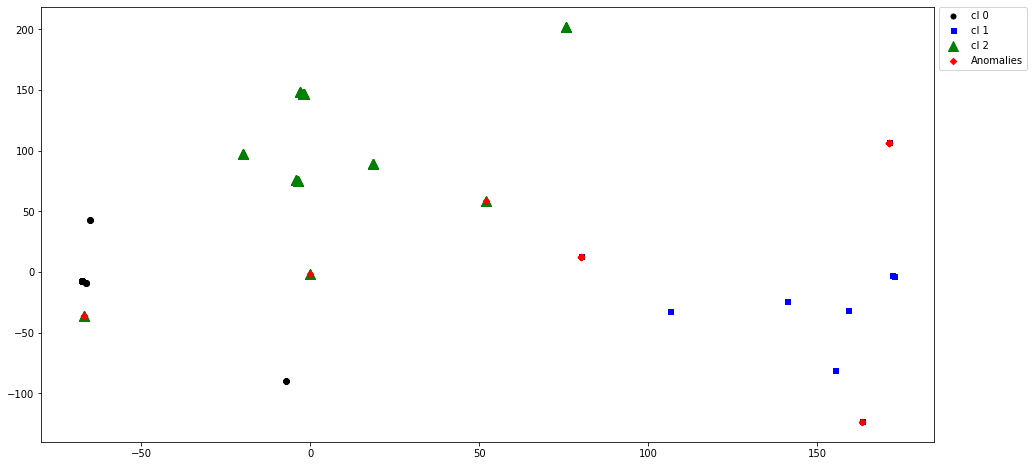

In [307]:
plt.rcParams["figure.figsize"] = (16,8)
pyplot.scatter(dfs0['pca1'],dfs0['pca2'],s=25,label="cl 0", color='black')
pyplot.scatter(dfs1['pca1'],dfs1['pca2'],s=25,marker=",",label="cl 1", color='blue')
pyplot.scatter(dfs2['pca1'],dfs2['pca2'],s=100,marker="^",label="cl 2", color='green')
pyplot.scatter(anomalies_df_s['pca1'],anomalies_df_s['pca2'],s=20,marker="D",label="Anomalies", color='red')

pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()